## Задание 1(2)

### Тест 1 (критерий Колмогорова и гамма-распределение)

Сначала в качестве предполагаемого распределения возьмем гамма-функцию $\Gamma(\theta_1, \theta_2)$ с плотностью распределения
$$p_{\theta_1, \theta_2}(x) = \frac{1}{\Gamma(\theta_1) \theta_2^{\theta_1}} x^{\theta_1-1} e^{-\frac{x}{\theta_2}}$$

Найдем выборочные параметры для распределения с помощью метода ~~максимального правдоподобия~~.
$$L(\theta_1, \theta_2 | X) = \prod_{i=1}^n \left[\frac{1}{\Gamma(\theta_1) \theta_2^{\theta_1}} X_i^{\theta_1-1} e^{-\frac{X_i}{\theta_2}} \right]$$

$$ln(L(\theta_1, \theta_2 | X)) = \sum_{i=1}^n \left[-ln (\Gamma(\theta_1)) - \theta_1 ln(\theta_2) 
+ (\theta_1-1) \cdot ln(X_i) 
-\frac{X_i}{\theta_2} \right]$$

$$\frac{\partial ln(L(\theta_1, \theta_2 | X))}{\partial \theta_1} = \sum_{i=1}^n \left[ -\psi(\theta_1) - ln(\theta_2) + ln(X_i) \right] = 0 \implies ...$$

$$\frac{\partial ln(L(\theta_1, \theta_2 | X))}{\partial \theta_2} = \sum_{i=1}^n \left[ -\frac{\theta_1}{\theta_2} + \frac{X_i}{\theta_2^2} \right] = 0 \implies \theta_2 = \frac{\overline{X}}{\theta_1}$$

Найдем с помощью метода моментов

$\begin{cases}
        E(X_1) = \theta_1 \theta_2 \\
        E(X_1^2) = Var(X_1) + (E(X_1))^2 = \theta_1 \theta_2^2 + (\theta_1 \theta_2)^2\\
 \end{cases}$
 
$\begin{cases}
        \overline{X} = \hat{\theta}_1 \hat{\theta}_2 \\
        \overline{X^2} = \hat{\theta}_1 \hat{\theta}_2^2 + (\hat{\theta}_1 \hat{\theta}_2)^2\\
 \end{cases}$
 
$\begin{cases}
        \hat{\theta}_1 = \frac{\overline{X}}{\hat{\theta}_2}\\
        \overline{X^2} = \overline{X} \hat{\theta}_2 + \overline{X}^2\\
 \end{cases}$
 
$\begin{cases}
        \hat{\theta}_1 = \frac{\overline{X}^2}{\overline{X^2} - \overline{X}^2} = \frac{\overline{X}^2}{S_*}\\
        \hat{\theta}_2 = \frac{\overline{X^2} - \overline{X}^2}{\overline{X}} = \frac{S_*}{\overline{X}}\\
 \end{cases}$
 
Применим тест Колмогорова-Смирнова с гипотезами:
- $H_0$: $X_1, ..., X_n \sim \Gamma(\hat{\theta}_1, \hat{\theta}_2)$
- $H_1$: $\neg H_0$

Статистика для этого теста:
$D_n = sup_{x \in \mathbb{R}}|F_n - F|$

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.stats import gamma, kstest, kstwo, norm, chisquare

In [2]:
def print_empirical_function(sample, th_distr, dots=1000, x_label = None):
    fig, ax = plt.subplots(1, 1)
    ax.ecdf(sample, label='empirical distribution')
    x_range = np.linspace(min(sample), max(sample), dots)
    ax.plot(x_range, th_distr(x_range), color='red', label='theoretical distribution')
    ax.legend()
    if x_label:
        ax.set_xlabel(x_label)
    plt.show()

In [3]:
def ks_test(sample, theoretical_distribution):
    n = len(sample)
    
    empirical_values = np.arange(0, n) / n
    theoretical_values = np.array([theoretical_distribution.cdf(x) for x in sorted(sample)])
    
    d = np.max(np.abs(empirical_values - theoretical_values))
    p_value = 1 - kstwo.cdf(d, n)
    return d, p_value

def first_test(sample, alpha = 0.05):    
    mean = np.mean(sample)
    var = np.var(sample)
    theta_1 = mean ** 2 / var
    theta_2 = var / mean
    th_distr = gamma(a=theta_1, scale=theta_2)
    
    ks_scipy = kstest(sample, th_distr.cdf)
    statistic, p_value_my = ks_test(sample, th_distr)
    result = "accept" if p_value_my > alpha else "reject"

    print_empirical_function(sample, th_distr.cdf)
    print("Тест Колмогорова-Смирнова")
    print(f"\tПредполагаемое распределение: Г{theta_1, theta_2}")
    print(f"\tРезультат: {result}")
    print(f"\tПодробный результат:\n\t\t Statistic: {statistic} \n\t\t P-value: {p_value_my}")
    print(f"\tРезультат kstest из scipy: {ks_scipy}")

### Тест 2 (критерий согласия Хи-квадрат и нормальное распределение)

В качестве предполагаемого распределения возьмем нормальное распределение $N(\theta_1, \theta_2)$

С помощью метода максимального правдоподобия найдем оценки параметров:
 
$$L(\theta | X) = \prod_{i=1}^n \frac{1}{\sqrt{2\pi\theta_2}} \exp(-\frac{(X_i - \theta_1)^2}{2\theta_2})$$
$$lnL(\theta | X) = \sum_{i=1}^n \left[ -\frac{1}{2}ln(2\pi) -\frac{1}{2}ln(\theta_2) - \frac{(X_i - \theta_1)^2}{2\theta_2} \right]$$

$$\begin{cases}
\frac{\partial ln(L(\theta_1, \theta_2 | X))}{\partial \theta_1} = \sum_{i=1}^n \frac{X_i - \theta_1}{\theta_2}\\
\frac{\partial ln(L(\theta_1, \theta_2 | X))}{\partial \theta_2} = \sum_{i=1}^n \left[ -\frac{1}{2\theta_2} + \frac{(X_i - \theta_1)^2}{2\theta_2^2} \right]
\end{cases}$$

$$\begin{cases}
\sum_{i=1}^n \frac{X_i - \hat{\theta}_1}{\hat{\theta}_2} = 0 \implies \hat{\theta}_1 = \overline{X}\\
\sum_{i=1}^n \left[ -\frac{1}{2\hat{\theta}_2} + \frac{(X_i - \hat{\theta}_1)^2}{2\hat{\theta}_2^2} \right] = 0 \implies \hat{\theta}_2 = S_*^2
\end{cases}$$

Для теста с помощью критерия согласия хи-квадрат необходимо разделить выборку и теоретическое распределение на интервалы

Статистика критерия определяется формулой: 
$$\chi_N^2 = \sum_{i=1}^N \frac{(\nu_i \cdot np_{\Delta_i})^2}{np_{\Delta_i}}$$

Гипотезы для теста:
- $H_0$: $\forall i \; \frac{\nu_i}{n} = p_{\Delta_i}$
- $H_1$: $\neg H_0$

Для наших гипотез с двумя неизвестными параметрами статистика будет стремиться к распределению $\chi^2 = \chi^2(N - 1 - 2)$

Тест правосторонний, поэтому
$$pvalue = 1 - \chi^2(\chi_N^2)$$

In [4]:
def second_test(sample, alpha = 0.05, n_intervals = 100):
    mean = np.mean(sample)
    var = np.var(sample)
    th_distr = norm(loc=mean, scale=np.sqrt(var))
    
    sorted_sample = sorted(sample)
    quantiles = np.quantile(sorted_sample, np.linspace(0, 1, n_intervals + 1))
    quantiles = np.unique(quantiles)
    n_intervals = len(quantiles) - 1
    
    freq, _ = np.histogram(sample, bins=quantiles)
    
    expected_freq = [0] * n_intervals
    for i in range(n_intervals):
        start = quantiles[i] if i > 0 else -np.inf
        end = quantiles[i + 1] if i + 1 < n_intervals else np.inf
        expected_freq[i] = th_distr.cdf(end) - th_distr.cdf(start)
    expected_freq = np.array(expected_freq) * len(sample)
    
    chi_scipy = chisquare(freq, expected_freq, ddof=2)
    result = "accept" if chi_scipy.pvalue > alpha else "reject"
    
    print_empirical_function(sample, th_distr.cdf)
    print("Критерий согласия хи-квадрат")
    print(f"\tПредполагаемое распределение: N{mean, np.sqrt(var)}")
    print(f"\tРезультат: {result}")
    print(f"\tРезультат chisquare из scipy: {chi_scipy}")

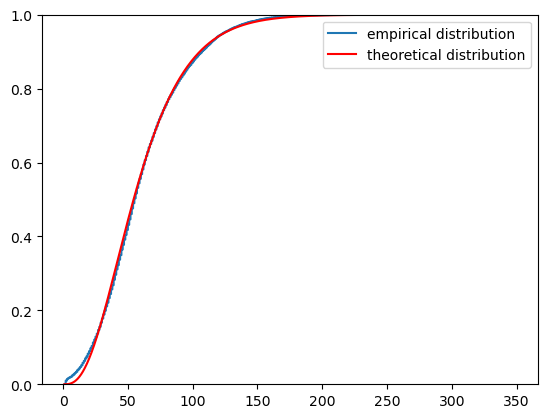

Тест Колмогорова-Смирнова
	Предполагаемое распределение: Г(3.244339540905617, 18.637382999428578)
	Результат: reject
	Подробный результат:
		 Statistic: 0.026256008748189674 
		 P-value: 1.911470981497132e-12
	Результат kstest из scipy: KstestResult(statistic=0.026256008748189674, pvalue=1.911027707901033e-12, statistic_location=45, statistic_sign=-1)


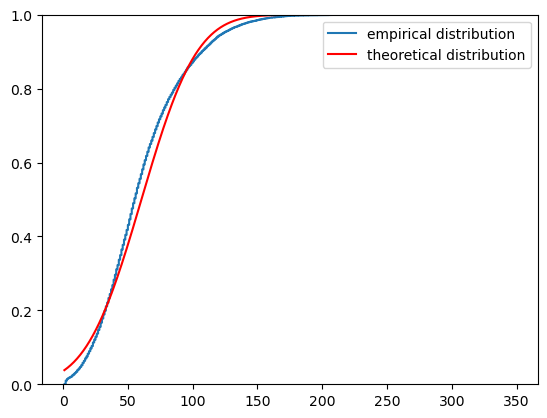

Критерий согласия хи-квадрат
	Предполагаемое распределение: N(60.46599860404826, 33.569747905317385)
	Результат: reject
	Результат chisquare из scipy: Power_divergenceResult(statistic=2826.0563619563163, pvalue=0.0)


In [5]:
def main():
    data = pd.read_csv('chess_games.csv')
    sample = data['turns'].to_numpy()
    
    first_test(sample)
    second_test(sample)

if __name__ == '__main__':
    main()